In [21]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
titanic_data = pd.read_csv('DS_Practice/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X = titanic_data.drop(["PassengerId","Survived",'Ticket','Cabin','Name'], axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)

#tree.plot_tree(clf, filled=True)
#clf.score(X_test,y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
titanic_data_test = pd.read_csv('test.csv')
test = titanic_data_test.drop(["PassengerId",'Ticket','Cabin','Name','Embarked'], axis=1)
test.Sex = test.Sex.replace(['male','female'],[1,0])
values = {'Age': titanic_data_test.Age.median()}
test.fillna(value = values)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,27.0,0,0,8.0500


In [30]:
res = clf.predict(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [16]:
scores_data = pd.DataFrame()
max_depth_valus = range(1,100)
for max_depth in max_depth_valus:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test,y_test)
    
    mean_cross_val_score = cross_val_score(clf,X_train,y_train,cv=5).mean()
    
    temp_df = pd.DataFrame({'max_depth':[max_depth],
                            'train_score':[train_score],
                            'test_score':[test_score],
                           'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_df)

NameError: name 'cross_val_score' is not defined

In [17]:
scores_data_long = pd.melt(scores_data,id_vars = ['max_depth'],value_vars = ['train_score','test_score','cross_val_score'],
                          var_name='set_type',value_name='score')
scores_data_long.head()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['max_depth']"

In [18]:
sns.lineplot(x='max_depth', y='score',hue='set_type',data=scores_data_long)

NameError: name 'scores_data_long' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cross_val_score(clf,X_train,y_train,cv=5).mean()

In [51]:
iris_data = pd.read_csv('DS_Practice/train_iris.csv')
X_iris_train = iris_data.drop(["species"], axis=1)

X_iris_test = iris_data.drop(["species"], axis=1)

y_iris = iris_data.species
y_iris_test = iris_data.species
rs = np.random.seed(0)

X_iris_train, X_iris_test, y_iris_train,y_iris_test = train_test_split(X_iris, y_iris, test_size=0.33)

NameError: name 'np' is not defined

In [52]:
scores_data = pd.DataFrame()
max_depth_valus = range(1,100)
for max_depth in max_depth_valus:
    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf_iris.fit(X_iris_train,y_iris_train)
    train_score = clf_iris.score(X_iris_train, y_iris_train)
    test_score = clf_iris.score(X_iris_test,y_iris_test)
    temp_df = pd.DataFrame({'max_depth':[max_depth],
                            'train_score':[train_score],
                            'test_score':[test_score]})   
    scores_data = scores_data.append(temp_df)
    
scores_data_long_iris = pd.melt(scores_data,id_vars = ['max_depth'],value_vars = ['train_score','test_score'],
                          var_name='set_type',value_name='score')

NameError: name 'rs' is not defined

In [13]:
sns.lineplot(x='max_depth', y='score',hue='set_type',data=scores_data_long_iris)

NameError: name 'scores_data_long_iris' is not defined

In [48]:
dog_cats = pd.read_csv('DS_Practice/dogs_n_cats.csv')
dog_cats
X_train = dog_cats.drop(['Вид'], axis = 1)
X_test = dog_cats.drop(['Вид'], axis = 1)
y_train = dog_cats['Вид']
y_test = dog_cats['Вид']



X_train_dog_cat, X_test_dog_cat, y_train_dog_cat,y_test_dog_cat = train_test_split(X_train, y_train, test_size=0.33)

In [49]:
clf_dog_cats = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf_dog_cats.fit(X_train_dog_cat, y_train_dog_cat)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [50]:
data_check = pd.read_json('DS_Practice/dataset_209691_15.txt')
result = clf_dog_cats.predict(data_check)
result

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',


In [45]:
pd.Series(result)[result == 'собачка'].count()

46

In [ ]:
songs_data = pd.read_csv('DS_Practice/songs.csv')

In [ ]:
X_train = songs_data.drop(['artist','song','year','genre','lyrics'],axis=1)
X_test = songs_data.drop(['artist','song','year','genre','lyrics'],axis=1)
y_train = songs_data.artist
y_test = songs_data.artist

In [ ]:
X_train_artist, X_test_artist, y_train_artist,y_test_artist = train_test_split(X_train, y_train, test_size=0.33)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train_artist,y_train_artist)

In [ ]:
predictions = clf.predict(X_test)

In [11]:
from sklearn.metrics import precision_score

In [12]:
pr = precision_score(y_test, predictions, average='micro' )
pr

NameError: name 'predictions' is not defined

In [20]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = {'criterion':['gini','entropy'],'max_depth':range(1, 30)}
clf = tree.DecisionTreeClassifier()
gdc_clf = GridSearchCV(clf, params, cv =5 )
gdc_clf.fit(X_train, y_train)

{'criterion': 'entropy', 'max_depth': 8}

In [28]:
best_clf = gdc_clf.best_estimator_

In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
y_pred = best_clf.predict(X_test)
precision_score(y_test,y_pred )
recall_score(y_test, y_pred)

0.65

<AxesSubplot:>

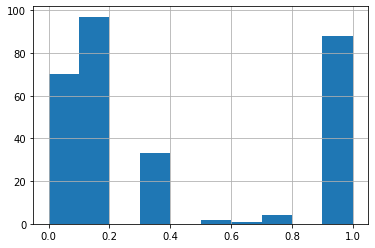

In [38]:
y_pred_prob = best_clf.predict_proba(X_test)
pd.Series(y_pred_prob[:, 1]).hist()